In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.shape

(10000, 14)

In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.drop_duplicates().shape

(10000, 14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'RowNumber'),
  Text(1, 0, 'CustomerId'),
  Text(2, 0, 'Surname'),
  Text(3, 0, 'CreditScore'),
  Text(4, 0, 'Geography'),
  Text(5, 0, 'Gender'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'Tenure'),
  Text(8, 0, 'Balance'),
  Text(9, 0, 'NumOfProducts'),
  Text(10, 0, 'HasCrCard'),
  Text(11, 0, 'IsActiveMember'),
  Text(12, 0, 'EstimatedSalary'),
  Text(13, 0, 'Exited')])

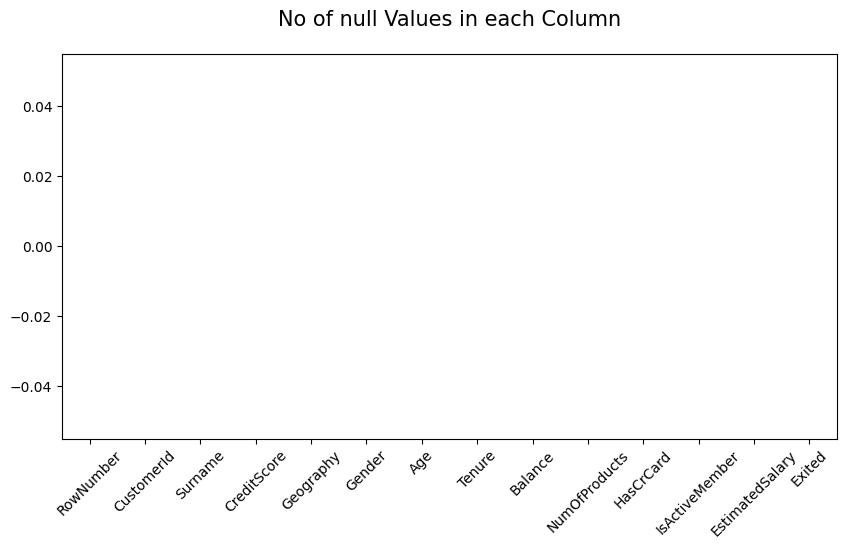

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x = data.isna().sum().index,y=data.isna().sum().values)
plt.title('No of null Values in each Column',fontsize=15,pad=20)
plt.xticks(rotation=45)

### As we can see there are No duplictes and null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


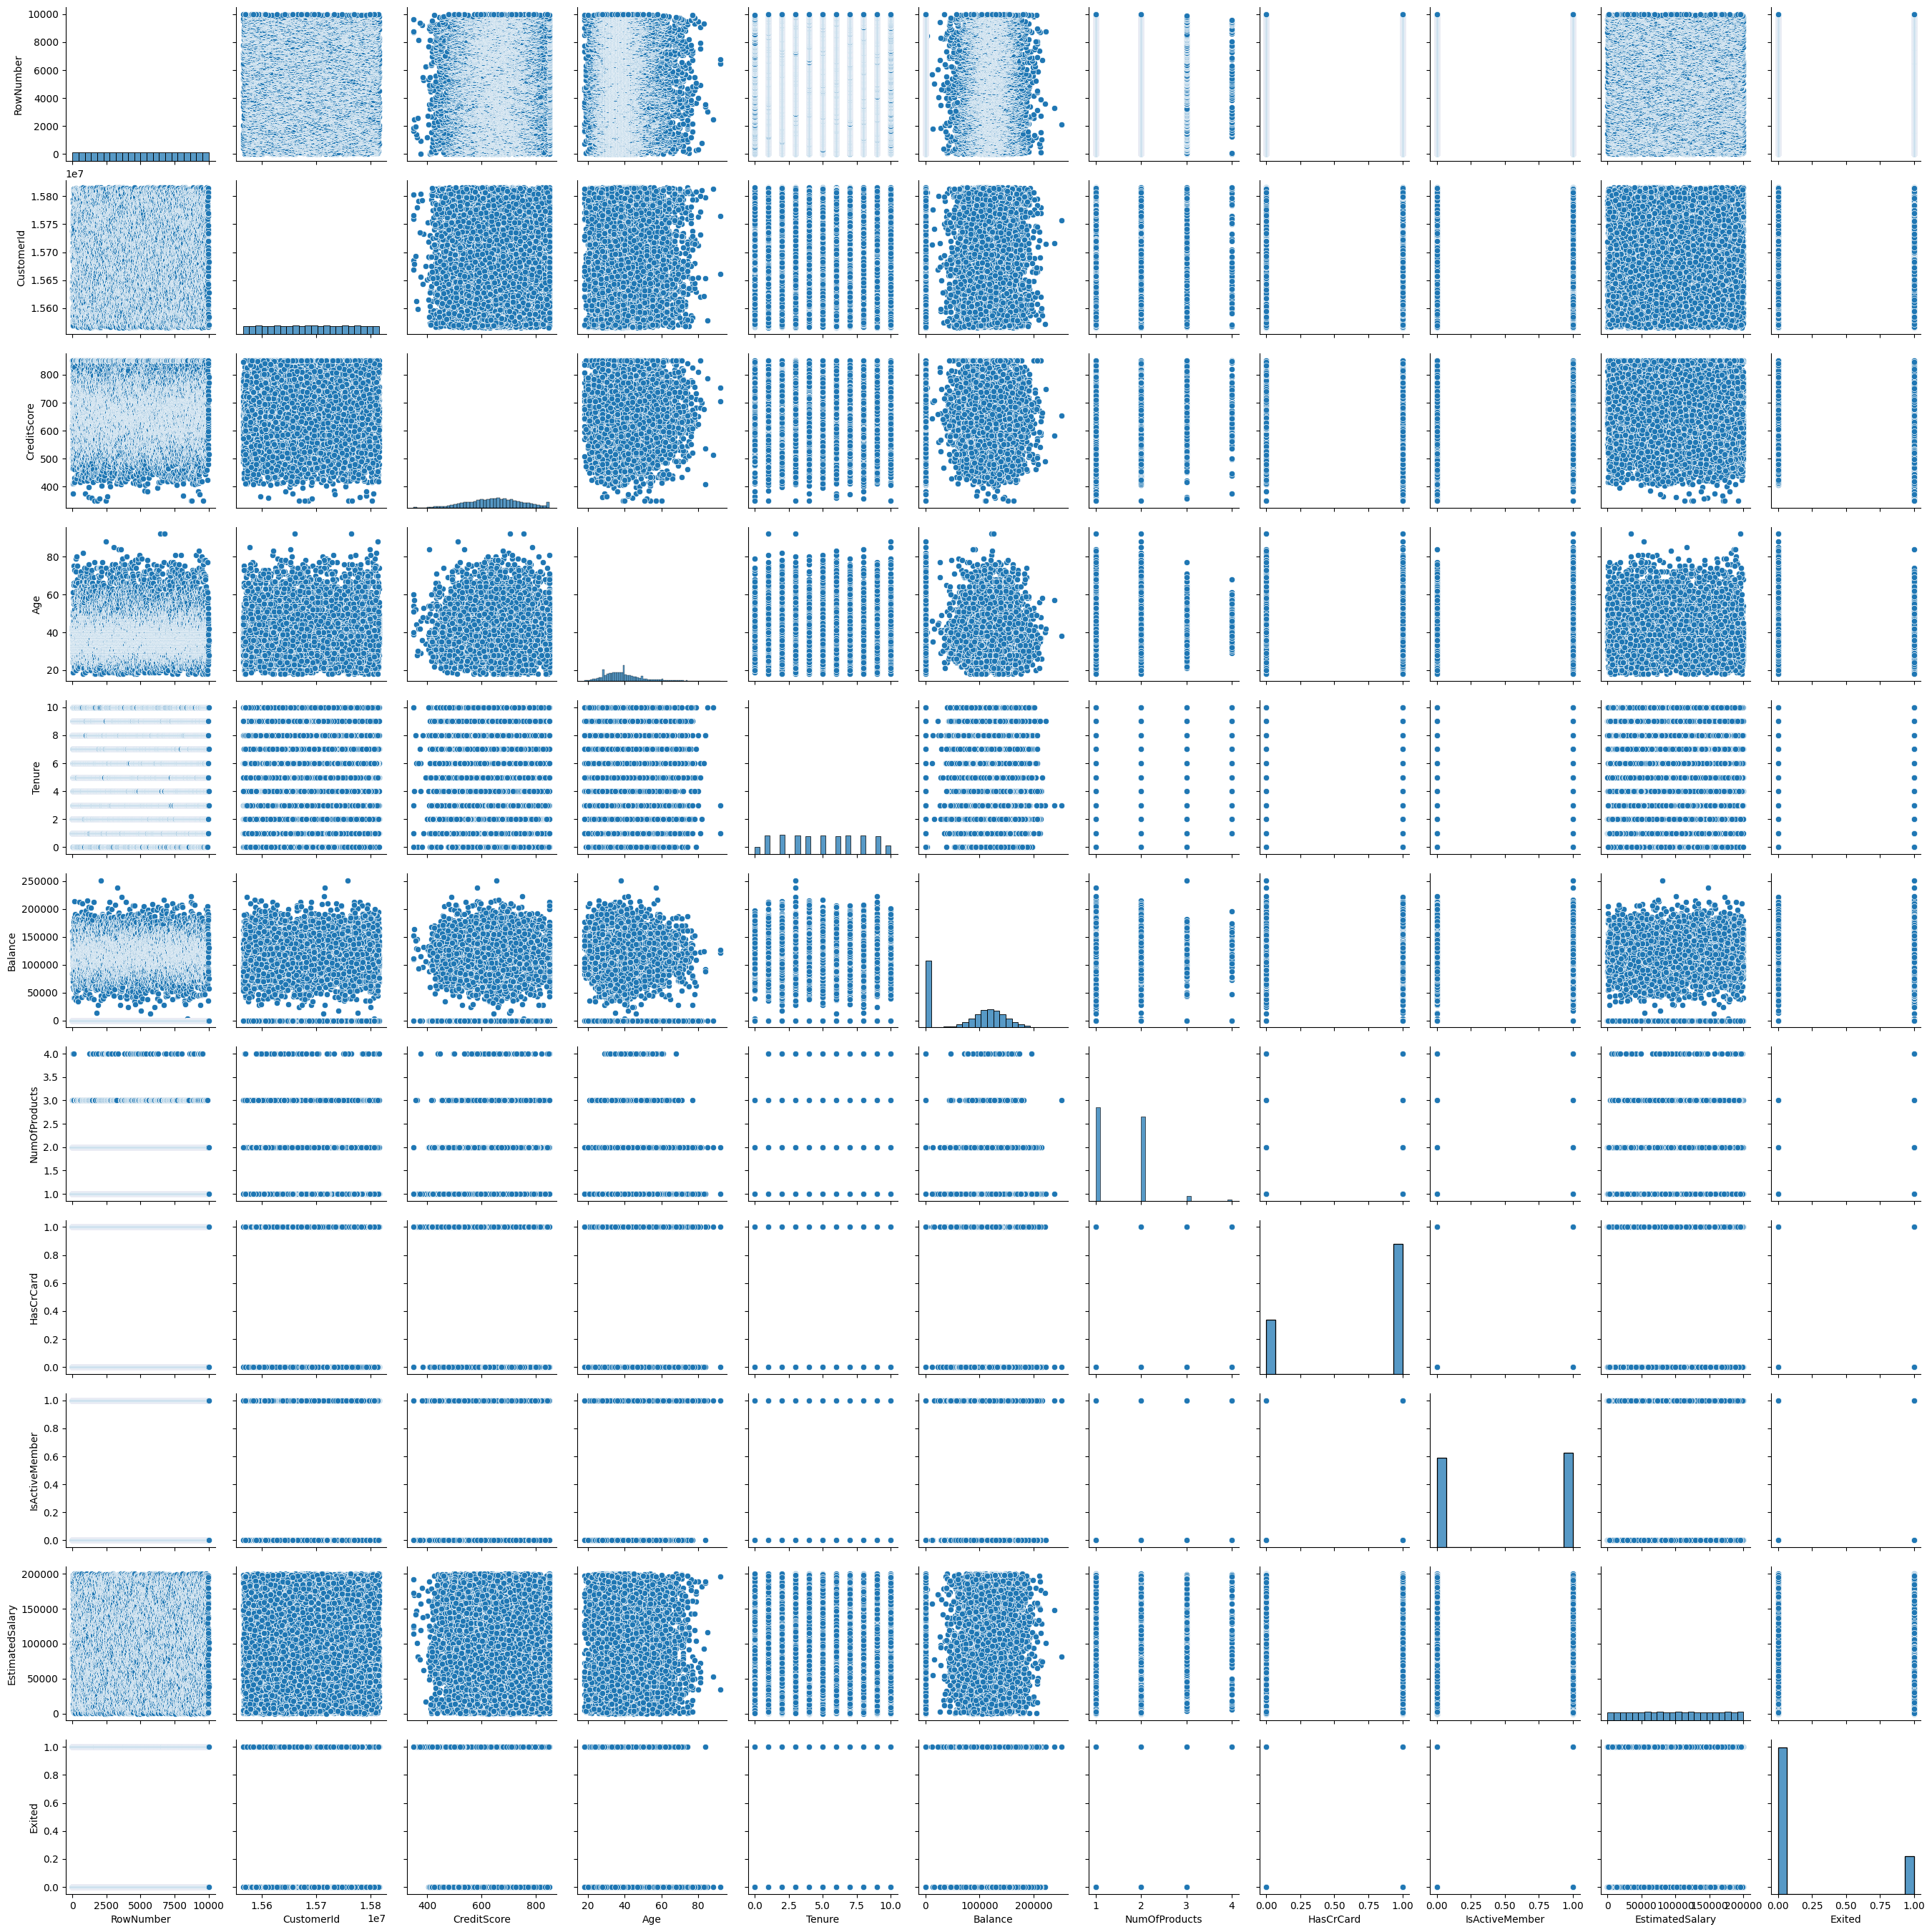

In [9]:
sns.pairplot(data=data)

In [10]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### RowNumber , Customerid , Surname columns has nothing to do with the a person to leave a churn

In [11]:
data = data.drop('RowNumber,CustomerId,Surname'.split(','),axis=1)

In [12]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [13]:
for col in data.columns:
    print(data[col].value_counts())
    print('\n','-'*50,'\n')

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

 -------------------------------------------------- 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

 -------------------------------------------------- 

Gender
Male      5457
Female    4543
Name: count, dtype: int64

 -------------------------------------------------- 

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

 -------------------------------------------------- 

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

 -------------------------------------------------- 

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
  

In [14]:
palette=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r'
         , 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
         'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
         'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
         'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
         'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
         'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
         'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
         'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest'
         , 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',
         'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
         'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
         'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
         'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
         'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
         'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r'
         , 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
         'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

Text(0.5, 1.0, 'Distribution of Exited Persons in the Dataset')

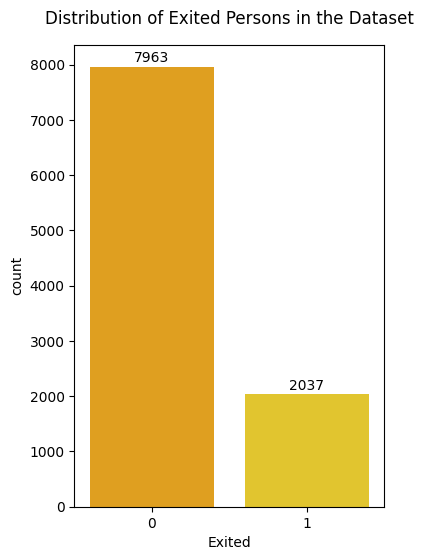

In [15]:
plt.figure(figsize=(4,6))
ax = sns.countplot(x=data['Exited'],palette=palette[np.random.randint(0,len(palette))])
for i in ax.containers:
    plt.bar_label(i,padding=1)
plt.title('Distribution of Exited Persons in the Dataset',pad=15)

### The dataset is clearly Imbalanced with a expected ratio 4 : 1

- Accuracy is curse in this dataset if the model classifies all the people as not Exited (0) our model would get atleast 79.63% accuracy
- we need to consider using insensitive algoithms towards imbalanced dataset

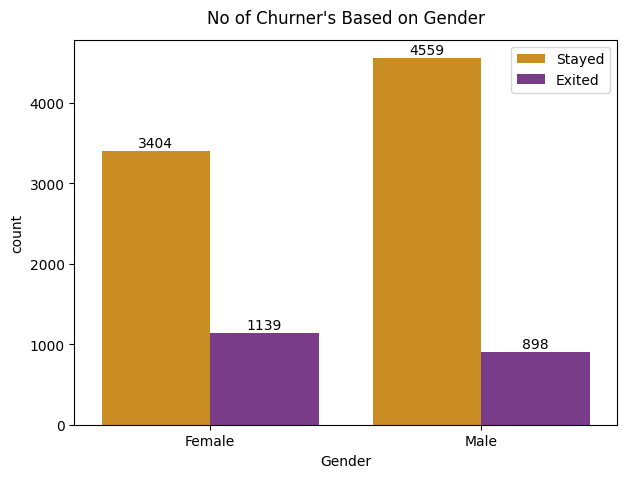

In [16]:
plt.figure(figsize=(7,5))
plt.title("No of Churner's Based on Gender",pad=12)
ax = sns.countplot(x=data['Gender'],hue=data['Exited'],palette=palette[np.random.randint(0,len(palette))])
for i in ax.containers:
    plt.bar_label(i,padding=1)
plt.legend(['Stayed','Exited'])

### Churning of Female's is 10% higher than male's

In [17]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [19]:
# sns.heatmap(data.corr())

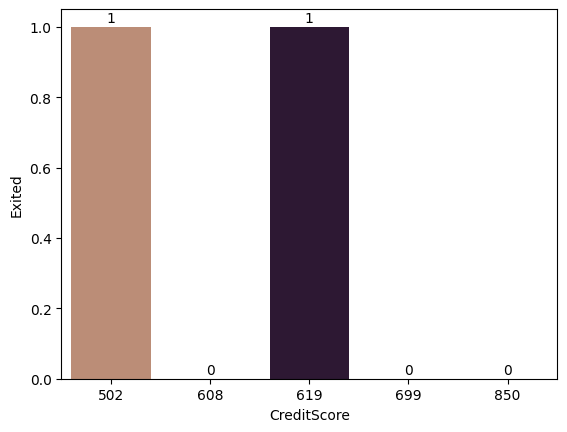

In [20]:
# plt.figure(figsize=(70,5))
ax = sns.barplot(y=data['Exited'][:5],x=data['CreditScore'][:5],palette=palette[np.random.randint(0,len(palette))])
for i in ax.containers:
    plt.bar_label(i,padding=1)
# plt.legend(['Stayed','Exited'])

In [21]:
min([score for score in data['CreditScore']]),max([score for score in data['CreditScore']])

(350, 850)

Text(0.5, 1.0, 'Disturbution of CreditScore')

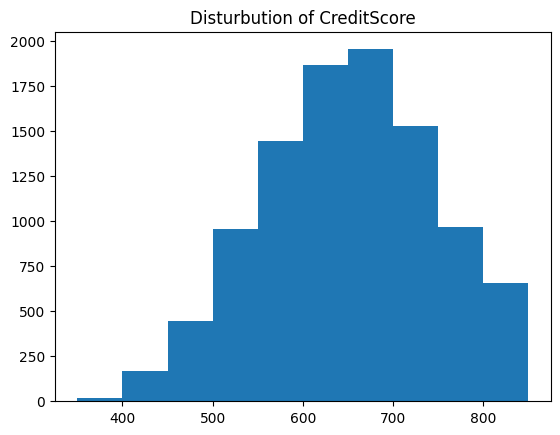

In [22]:
plt.hist(data['CreditScore'])
plt.title('Disturbution of CreditScore')

Text(0.5, 1.0, 'Disturbution of Churners By CreditScore')

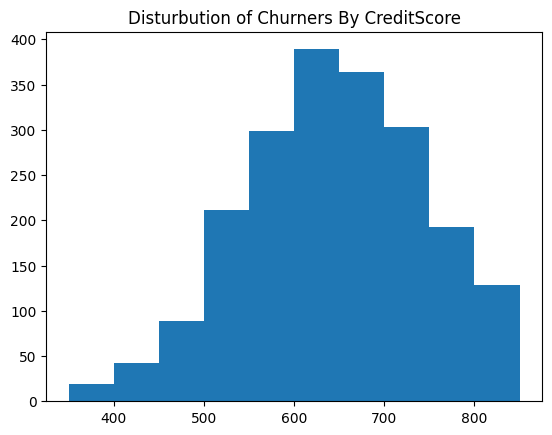

In [23]:
plt.hist(data[data['Exited']==1]['CreditScore'])
plt.title('Disturbution of Churners By CreditScore')

### The persons who have credit score greater than 500 and less than 800 are more likely to churn

In [24]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [25]:
data[data['Exited']==1].groupby('Balance').size()

Balance
0.00         500
3768.69        1
12459.19       1
23503.31       1
24043.45       1
            ... 
213146.20      1
216109.88      1
222267.63      1
238387.56      1
250898.09      1
Length: 1538, dtype: int64

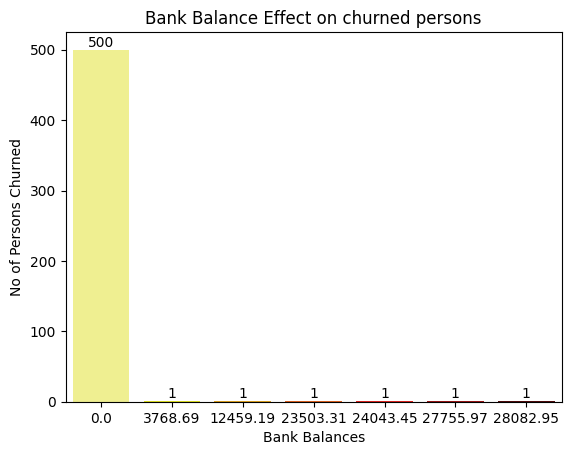

In [26]:
ax = sns.barplot(x=data[data['Exited']==1].groupby('Balance').size().index[:7],y=data[data['Exited']==1].groupby('Balance').size().values[:7],palette=palette[np.random.randint(0,len(palette))])
plt.title('Bank Balance Effect on churned persons')
plt.xlabel('Bank Balances')
plt.ylabel('No of Persons Churned')
for i in ax.containers:
    plt.bar_label(i)

### Bank balance : 0 Rs members are highly likely to churn

Text(0.5, 1.0, 'No of persons having 0 Balance based on gender')

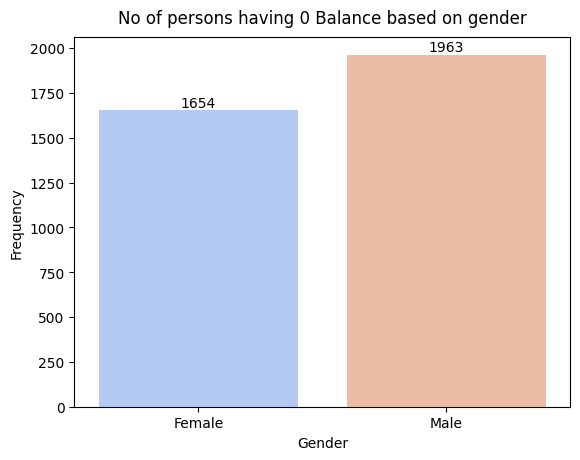

In [27]:
ax=sns.barplot(x=data[data['Balance']==0.00].groupby('Gender').size().index,y=data[data['Balance']==0.00].groupby('Gender').size().values,palette=palette[np.random.randint(0,len(palette))])
for i in ax.containers:
    plt.bar_label(i)
plt.ylabel('Frequency')
plt.title('No of persons having 0 Balance based on gender',pad=10)

(array([   8.,  100.,  228.,  525.,  807., 1017., 1058.,  845.,  508.,
         361.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

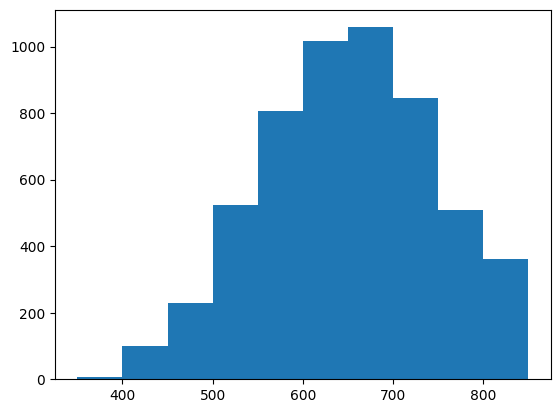

In [28]:
plt.hist(data[data['Gender']!='Female']['CreditScore'])

(array([   8.,  100.,  228.,  525.,  807., 1017., 1058.,  845.,  508.,
         361.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

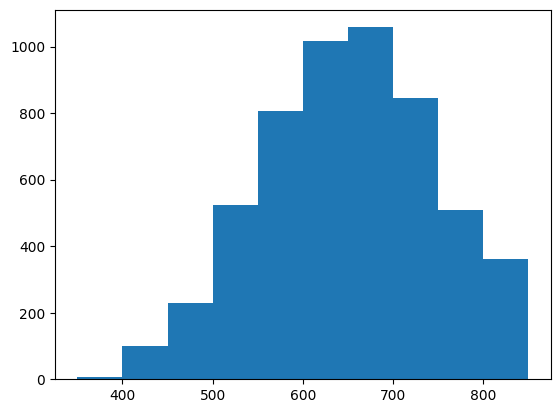

In [29]:
plt.hist(data[data['Gender']!='Female']['CreditScore'])

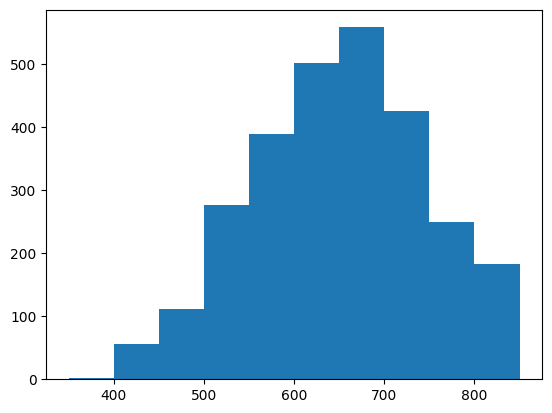

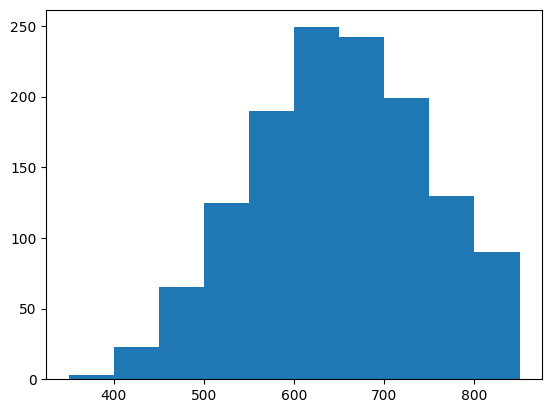

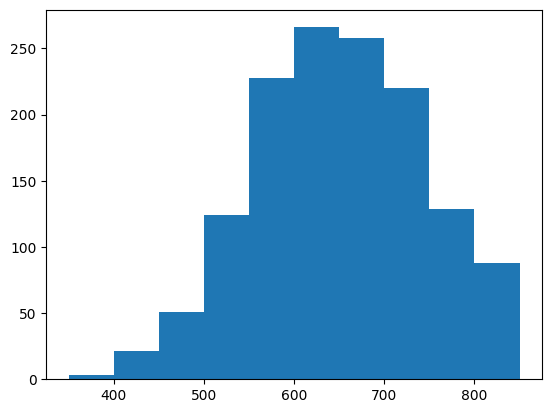

In [30]:
for loc in data['Geography'].value_counts().index:
    plt.hist(data[(data['Gender']!='Female') & (data['Geography']==f'{loc}')]['CreditScore'])
    plt.show()

In [31]:
data[(data['Gender']!='Female') & (data['Geography']=='France')]

CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
6             822    France   Male   50       7       0.00              2   
8             501    France   Male   44       4  142051.07              2   
9             684    France   Male   27       2  134603.88              1   
10            528    France   Male   31       6  102016.72              2   
20            732    France   Male   41       8       0.00              2   
...           ...       ...    ...  ...     ...        ...            ...   
9985          659    France   Male   36       6  123841.49              2   
9988          775    France   Male   30       4       0.00              2   
9993          644    France   Male   28       7  155060.41              1   
9995          771    France   Male   39       5       0.00              2   
9996          516    France   Male   35      10   57369.61              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6             1               1         10062.80       0  
8             0               1         74940.50       0  
9             1               1         71725.73       0  
10            0               0         80181.12       0  
20            1               1        170886.17       0  
...         ...             ...              ...     ...  
9985          1               0         96833.00       0  
9988          1               0         49337.84       0  
9993          1               0         29179.52       0  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  

[2753 rows x 11 columns]

In [33]:
# data.corr()['Exited'].sort_values()

In [34]:
df = data.copy()

In [35]:
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

In [36]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [37]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [38]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
df2=pd.get_dummies(df['Geography'])

In [40]:
final_df = pd.concat([df,df2],axis=1)

In [41]:
final_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0          1               1        101348.88       1    True    False  False  
1          0               1        112542.58       0   False    False   True  
2          1               0        113931.57       1    True    False  False  
3          0               0         93826.63       0    True    False  False  
4          1               1         79084.10       0   False    False   True

In [42]:
final_df.drop('Geography',axis=1,inplace=True)

In [43]:
final_df.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
France            -0.104955
Spain             -0.052667
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Gender             0.106512
Balance            0.118533
Germany            0.173488
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [44]:
train_data = final_df.drop('Exited',axis=1)
test_data = final_df['Exited']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,test_data,test_size=0.2,random_state=45)

In [46]:
x_train.shape,y_train.shape

((8000, 12), (8000,))

In [47]:
def train_model(models):
    accuracy_records = {'name':[],'accuracy':[]}
    for model_name in models:
        model = model_name
        model.fit(x_train,y_train)
        pred =model.predict(x_test)
        print(f'{model_name}'[:-2],'\n')
        print('Accuracy : ',accuracy_score(y_test,pred)*100,'%')
        print('\nClassification Report\n')
        print(classification_report(y_test,pred))
        accuracy_records['name'].append(f'{model_name}'[:-2])
        accuracy_records['accuracy'].append(accuracy_score(y_test,pred)*100)
    ax=sns.barplot(x=accuracy_records['name'],y=accuracy_records['accuracy'],palette=palette[np.random.randint(0,len(palette))])
    plt.title('Accuracy of the models',pad=10)
    plt.xlabel('Model Name')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    
    for i in ax.containers:
        plt.bar_label(i)
    plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [49]:
models = [RandomForestClassifier(),DecisionTreeClassifier(),PassiveAggressiveClassifier(),LogisticRegression(),MultinomialNB(),SVC()]

RandomForestClassifier 

Accuracy :  86.4 %

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1581
           1       0.82      0.45      0.58       419

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

DecisionTreeClassifier 

Accuracy :  79.2 %

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1581
           1       0.50      0.50      0.50       419

    accuracy                           0.79      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000

PassiveAggressiveClassifier 

Accuracy :  27.900000000000002 %

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.14      0.23      1581
           1  

C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

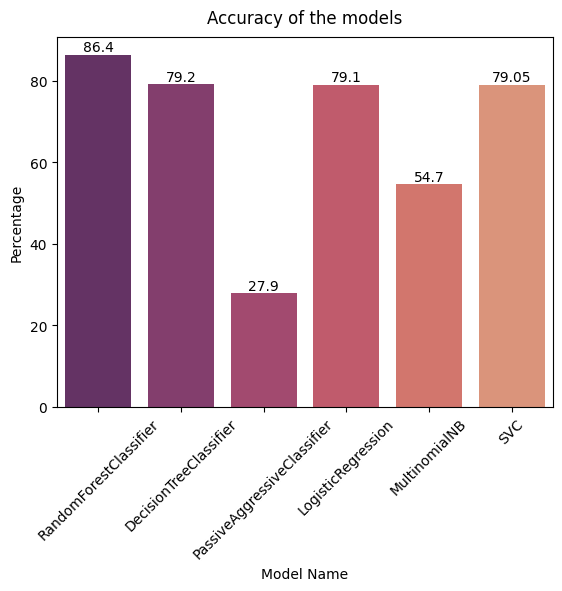

In [50]:
train_model(models)

In [51]:
# df.to_csv('cleaned.csv')

In [52]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
import joblib
joblib.dump(model,'rf_ model.joblib')

['rf_ model.joblib']

In [56]:
model = joblib.load('rf_ model.joblib')

In [ ]:
# accuracy_score(y_test,model.predict(x_test)

In [ ]:
model.predict(np.array(x_test.iloc[0].values).reshape(-1,1))

In [ ]:
x_train.iloc[0].values

In [ ]:
x_test.iloc[0]

In [ ]:
np.array(x_test.iloc[0].values).reshape(-1,1)

In [ ]:
sample = np.array([[597,1,60,0,131778.08,1,0,0,10703.53,1,0,0]])
prediction = model.predict(sample)

In [ ]:
prediction

In [58]:
x_test.to_csv('x_test.csv')

In [60]:
train_data.to_csv('train.csv')